# Info

In this notebook I will try the ML/Data Science Library "PyCaret" for Classification. 

Tutorial: https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb

# Imports & Installs 

In [7]:
# pip install pycaret
import pycaret as pc
import pandas as pd 

# Get data

In [8]:
dataset = pd.read_csv("Health Insurance/train.csv")

In [9]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
dataset.shape[0]

381109

In [11]:
# Useen data for predictions
dataset_unseen = pd.read_csv("Health Insurance/test.csv")
dataset_unseen.shape[0]

127037

# Setup

In [16]:
from pycaret.classification import *
clf = setup(data = dataset, target = 'Response', session_id=123)

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(381109, 12)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# Models

In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0900
ada,Ada Boost Classifier,0.8772,0.8516,0.0003,0.2936,0.0006,0.0004,0.0062,3.6560
gbc,Gradient Boosting Classifier,0.8772,0.8555,0.0001,0.3333,0.0002,0.0002,0.0047,15.3240
lightgbm,Light Gradient Boosting Machine,0.8769,0.8569,0.0030,0.3636,0.0060,0.0040,0.0233,1.4900
lda,Linear Discriminant Analysis,0.8768,0.8338,0.0027,0.3305,0.0053,0.0033,0.0198,0.3290
lr,Logistic Regression,0.8734,0.7342,0.0311,0.2011,0.0529,0.0347,0.0528,1.5820
rf,Random Forest Classifier,0.8663,0.8342,0.1201,0.3652,0.1807,0.1277,0.1515,12.7350
et,Extra Trees Classifier,0.8621,0.8268,0.1448,0.3514,0.2051,0.1437,0.1608,15.0940
knn,K Neighbors Classifier,0.8586,0.5955,0.0550,0.2109,0.0872,0.0383,0.0488,5.1050
svm,SVM - Linear Kernel,0.8380,0.0000,0.0782,0.1101,0.0485,0.0108,0.0144,4.4760


In [18]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# Create model

I will take Ridge Classifier & Ada Boost Classifier as a model. 

In [21]:
ridge = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [22]:
ada = create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8772,0.8512,0.0003,1.0000,0.0006,0.0005,0.0164
1,0.8772,0.8517,0.0003,1.0000,0.0006,0.0005,0.0164
2,0.8772,0.8560,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8772,0.8492,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8770,0.8516,0.0018,0.3529,0.0036,0.0024,0.0177
5,0.8771,0.8504,0.0003,0.2500,0.0006,0.0003,0.0047
6,0.8772,0.8506,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8772,0.8519,0.0003,0.3333,0.0006,0.0004,0.0068
8,0.8772,0.8528,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8772,0.8511,0.0000,0.0000,0.0000,0.0000,0.0000


# Tune model

I will focus on Accuracy but it is also possible to change it to AUC, Recall ... depending on the business case.

Our target/label is very unbalanced, so Accuracy is not the best choice! I should consider another performance metric, but I will continue with Accuracy because of the purpose of test. 

good article: https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b 

In [23]:
ridge_tuned = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [24]:
ada_tuned = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8772,0.8357,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8772,0.8408,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8772,0.8422,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8772,0.8349,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8772,0.8371,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8772,0.8354,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8772,0.8354,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8772,0.8374,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8772,0.8374,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8772,0.8386,0.0000,0.0000,0.0000,0.0000,0.0000


# Plot Model

**Ridge**

In [27]:
# AUC
plot_model(ridge_tuned, plot = "auc")

TypeError: AUC plot not available for estimators with no predict_proba attribute.

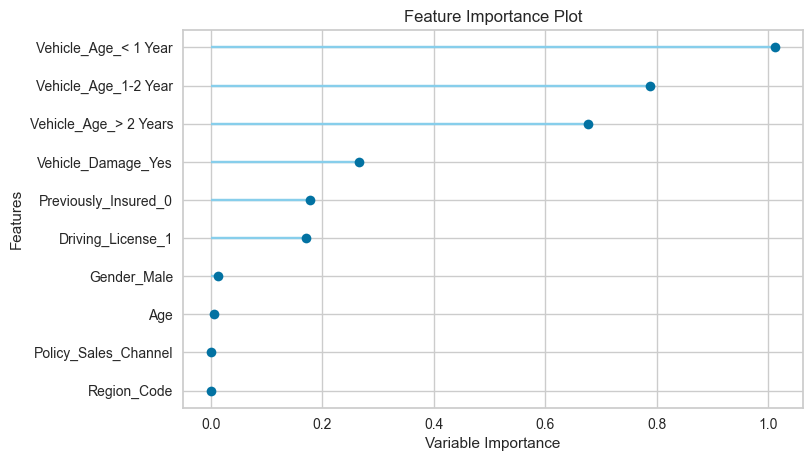

In [29]:
# Feature Importance 
plot_model(ridge_tuned, plot= 'feature')

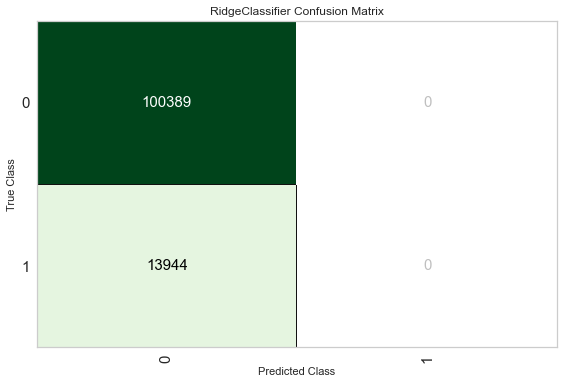

In [30]:
# Confusion Matrix
plot_model(ridge_tuned, plot = 'confusion_matrix')

**Ada**

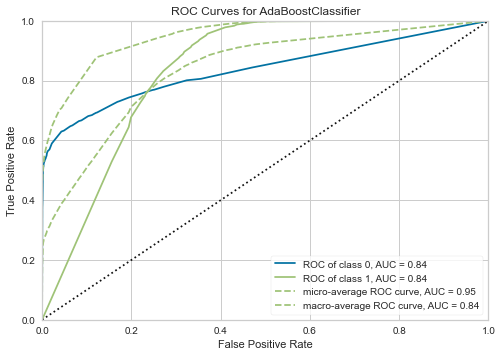

In [31]:
# AUC
plot_model(ada_tuned, plot = "auc")

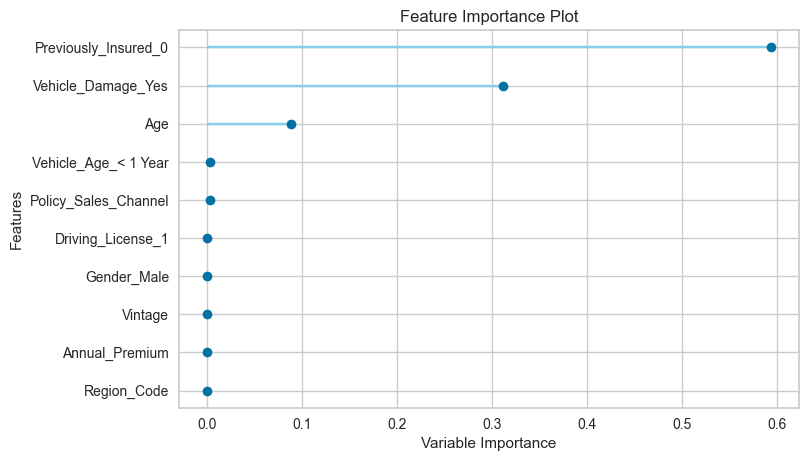

In [33]:
# Feature Importance 
plot_model(ada_tuned, plot= 'feature')

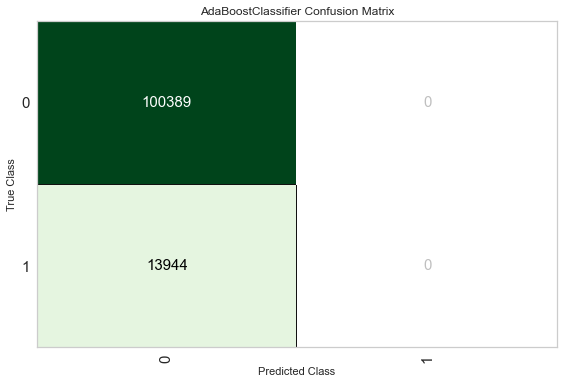

In [34]:
# Confusion Matrix
plot_model(ada_tuned, plot = 'confusion_matrix')

# Predict on test

In [35]:
# Ridge
predict_model(ridge_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8780,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Driving_License_1,Previously_Insured_0,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response,Label
0,22.0,46.0,2630.0,160.0,267.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0
1,27.0,41.0,2630.0,160.0,275.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
2,46.0,28.0,32816.0,124.0,138.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3,25.0,29.0,41936.0,152.0,34.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
4,21.0,30.0,33446.0,152.0,295.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,42.0,28.0,28609.0,124.0,64.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
114329,62.0,28.0,65932.0,13.0,210.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
114330,48.0,6.0,22611.0,26.0,288.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,0
114331,67.0,50.0,34190.0,8.0,152.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [36]:
# Ada
predict_model(ada_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8780,0.8376,0.0000,0.0000,0.0000,0.0000,0.0000


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Driving_License_1,Previously_Insured_0,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Response,Label,Score
0,22.0,46.0,2630.0,160.0,267.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0.5564
1,27.0,41.0,2630.0,160.0,275.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0.6587
2,46.0,28.0,32816.0,124.0,138.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.6972
3,25.0,29.0,41936.0,152.0,34.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.7143
4,21.0,30.0,33446.0,152.0,295.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0.5564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,42.0,28.0,28609.0,124.0,64.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0.5869
114329,62.0,28.0,65932.0,13.0,210.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7049
114330,48.0,6.0,22611.0,26.0,288.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,0,0.5287
114331,67.0,50.0,34190.0,8.0,152.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.7086


# Finalize model for deployment

I take the model that performed better on test data.

In [37]:
final_ada = finalize_model(ada_tuned)

In [39]:
print(final_ada)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)


In [40]:
predict_model(final_ada);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8780,0.8390,0.0000,0.0000,0.0000,0.0000,0.0000


# Predict on unseen data

In [41]:
unseen_predictions = predict_model(final_ada, data=dataset_unseen)
unseen_predictions.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Label,Score
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0,0.7144
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0,0.5283
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0,0.5283
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0,0.6655
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0,0.7099


In [43]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Response'], unseen_predictions['Label'], metric = 'Accuracy')

KeyError: 'Response'

Dataset is from a competiton, so there is no "Response" (Label/Target) in the test dataset.

# Save & load model

In [44]:
# Save
save_model(final_ada, "Final CLF ADA Model - 05042021")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dummy', Dummify(target='Response')),
                 ('fix_perfect', Remove_100(target='Response')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                

In [45]:
# Load 
saved_final_ada = load_model('Final CLF ADA Model - 05042021')

Transformation Pipeline and Model Successfully Loaded


In [46]:
new_prediction = predict_model(saved_final_ada, data=dataset_unseen)

In [47]:
new_prediction.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Label,Score
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0,0.7144
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0,0.5283
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0,0.5283
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0,0.6655
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0,0.7099


# Next Steps

Intermediate Tutorial to tackle problems like unbalanced label: https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb